1. Missing Values handling: fillna(), replace()
2. Multiple Linear Regression
3. Implementation of MLR
4. Boston housing price prediction


In [12]:
from pandas import*
from numpy import*
from sklearn import*
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
data = read_csv('student_data.csv')
data.head()

,Id,CS,Math,Name
0,1,50.0,46.0,Average
1,2,NaN,70.0,Good
2,3,88.0,NaN,Execellent
3,4,NaN,74.0,NaN
4,5,63.0,NaN,Average


In [4]:
data.shape

(10, 4)

In [6]:
data.isnull().sum()

Id      0
CS      4
Math    4
Name    2
dtype: int64

In [7]:
sum(data.isna().sum(axis = 1) > 0)

6

In [8]:
sum(data.isna().sum(axis = 0) > 0)

3

In [17]:
from seaborn import*
import seaborn as sns

<AxesSubplot:>

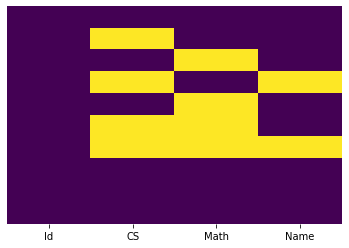

In [10]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [11]:
df = data.fillna(0) #function_1
df.head()

,Id,CS,Math,Name
0,1,50.0,46.0,Average
1,2,0.0,70.0,Good
2,3,88.0,0.0,Execellent
3,4,0.0,74.0,0
4,5,63.0,0.0,Average


<AxesSubplot:>

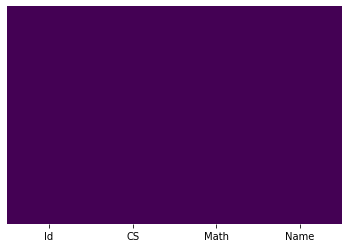

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df2 = data.fillna(
    {
        'CS': 0,
        'Math': 0,
        'Name': "Unknown"
    }

)
df2

,Id,CS,Math,Name
0,1,50.0,46.0,Average
1,2,0.0,70.0,Good
2,3,88.0,0.0,Execellent
3,4,0.0,74.0,Unknown
4,5,63.0,0.0,Average
5,6,0.0,0.0,Execellent
6,7,0.0,0.0,Unknown
7,8,53.0,45.0,Average
8,9,60.0,62.0,Good
9,10,55.0,65.0,Good


In [16]:
df3 = data.fillna(method='ffill')
df3

,Id,CS,Math,Name
0,1,50.0,46.0,Average
1,2,50.0,70.0,Good
2,3,88.0,70.0,Execellent
3,4,88.0,74.0,Execellent
4,5,63.0,74.0,Average
5,6,63.0,74.0,Execellent
6,7,63.0,74.0,Execellent
7,8,53.0,45.0,Average
8,9,60.0,62.0,Good
9,10,55.0,65.0,Good


In [18]:
df4 = data.fillna(method='bfill')
df4

,Id,CS,Math,Name
0,1,50.0,46.0,Average
1,2,88.0,70.0,Good
2,3,88.0,74.0,Execellent
3,4,63.0,74.0,Average
4,5,63.0,45.0,Average
5,6,53.0,45.0,Execellent
6,7,53.0,45.0,Average
7,8,53.0,45.0,Average
8,9,60.0,62.0,Good
9,10,55.0,65.0,Good


In [20]:
df5 = data.fillna(method='bfill',axis=0)
df5

,Id,CS,Math,Name
0,1,50.0,46.0,Average
1,2,88.0,70.0,Good
2,3,88.0,74.0,Execellent
3,4,63.0,74.0,Average
4,5,63.0,45.0,Average
5,6,53.0,45.0,Execellent
6,7,53.0,45.0,Average
7,8,53.0,45.0,Average
8,9,60.0,62.0,Good
9,10,55.0,65.0,Good


In [24]:
df6 = data.interpolate() #function_2
df6

,Id,CS,Math,Name
0,1,50.000000,46.00,Average
1,2,69.000000,70.00,Good
2,3,88.000000,72.00,Execellent
3,4,75.500000,74.00,NaN
4,5,63.000000,66.75,Average
5,6,59.666667,59.50,Execellent
6,7,56.333333,52.25,NaN
7,8,53.000000,45.00,Average
8,9,60.000000,62.00,Good
9,10,55.000000,65.00,Good


In [26]:
df7 = data.dropna() #function _3
df7

,Id,CS,Math,Name
0,1,50.0,46.0,Average
7,8,53.0,45.0,Average
8,9,60.0,62.0,Good
9,10,55.0,65.0,Good


In [28]:
df8 = data.replace(np.NaN,666)#Function_4
df8

,Id,CS,Math,Name
0,1,50.0,46.0,Average
1,2,666.0,70.0,Good
2,3,88.0,666.0,Execellent
3,4,666.0,74.0,666
4,5,63.0,666.0,Average
5,6,666.0,666.0,Execellent
6,7,666.0,666.0,666
7,8,53.0,45.0,Average
8,9,60.0,62.0,Good
9,10,55.0,65.0,Good


#### Multiple Linear Regression

In [2]:
from sklearn.datasets import load_boston

In [3]:
btn = load_boston()

In [4]:
btn.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
btn['data'].shape

(506, 13)

In [6]:
bt = pd.DataFrame(btn.data)
bt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
bt.shape

(506, 13)

In [8]:
bt.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [9]:
bt.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

<AxesSubplot:>

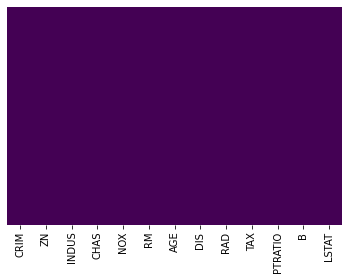

In [16]:
sns.heatmap(bt.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [20]:
btn2.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [15]:
bt.columns = btn.feature_names
bt.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [17]:
bt['Price'] = btn.target
bt.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [18]:
x = bt.drop('Price', axis=1) ##2D

In [19]:
y = bt['Price'] ##1D

In [27]:
print(y.head(1))
print(x.head(1))

0    24.0
Name: Price, dtype: float64
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.09  1.0  296.0     15.3   

       B  LSTAT  
0  396.9   4.98  


#### Build a Model

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.33, random_state=5)

#### Training

In [22]:
ml = LinearRegression()
ml.fit(xtrain,ytrain)  

LinearRegression()

In [23]:
ypre_train = ml.predict(xtrain) # actual y_train
ypre_test = ml.predict(xtest) #actual y_test

In [24]:
df = pd.DataFrame(ypre_test,ytest)
df.head()

,0
Price,
37.6,37.467236
27.9,31.391547
22.6,27.120196
13.8,6.468433
35.2,33.629667


#### Error:

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mse  = mean_squared_error(ytest,ypre_test)
print('The mse is:',mse)

The mse is: 28.530458765974604


#### Visualization

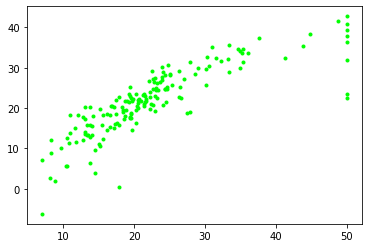

In [38]:
plt.scatter(ytest,ypre_test, c = 'lime', marker='.')
#plt.plot(ytest,ml.predict(xtest))
plt.show()